In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from statsmodels.formula.api import ols
import statsmodels.graphics as smgraphics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
import random
from scipy import stats
import pickle

## Plotting functions

In [2]:
def strtolist(val):
    """Convert string to list of floats"""
    ls = val.strip('[]').split()
    new = []
    for v in ls:
        new.append(float(v))
    return(np.array(new))

def strtolistc(val):
    """Convert string to list of floats"""
    ls = val.strip('[]').split(',')
    new = []
    for v in ls:
        new.append(float(v))
    return(np.array(new))
def mean(ls):
    return ls.mean()

In [3]:
c_ls = ['authority']
acc_ls = ['BrierT']

#### Calculate frequency of significant (p<0.05) correlation between centrality and accuracy

In [4]:
grain = 5

def how_often(df, acc):
    """calculate the % of runs where centrality predicts accuracy @t."""
    by_steps = {key: [] for key in c_ls}
    for step in range(int(df.iloc[-1]['Step']/grain)):
        temp = {key: [] for key in c_ls}
        for run in df.run.unique():
            r = df[(df['Step']>=step*grain) & (df['Step']<(step+1)*grain) & (df['run']==run)]
            for c in c_ls:
                try:
                    slope, intercept, r_value, p_value, std_err = stats.linregress(r[c], r[acc])
                    if p_value < 0.05:
                        temp[c].append(slope)
                    else:
                        temp[c].append(0)
                except Exception:
                    temp[c].append(0)
        for c in c_ls:
            by_steps[c].append(len([num for num in temp[c] if num < 0])/len(temp[c]))
    return by_steps

#### Calculate R-value between centrality and accuracy

In [5]:
grain = 1

def how_strong(df, acc):
    """calculate the average R-values for accuracy ~ centrality @t."""
    by_steps = {key: [] for key in c_ls}
    for step in range(int(df.iloc[-1]['Step']/grain)):
        temp = {key: [] for key in c_ls}
        for run in df.run.unique():
            centrality = df[(df['Step']>=step*grain) & (df['Step']<(step+1)*grain) & (df['run']==run)]['authority']
            acc = df[(df['Step']>=step*grain-1) & (df['Step']<(step+1)*grain-1) & (df['run']==run)]['BrierT']
            try:
                slope, intercept, r_value, p_value, std_err = stats.linregress(centrality, acc)
                temp['authority'].append(r_value)
            except Exception:
                temp['authority'].append(0)
        by_steps['authority'].append(sum(temp['authority'])/len(temp['authority']))
    return by_steps

#### Plot meta-expertise comparison

In [14]:
linestyles = ['solid', 'dashed', 'dotted', 'dashdot']

In [15]:
def compare(data, labels, c, legend_pos=(0.89, 0.875), legend=True):
    """Meta-expertise comparison with the basic model"""
    """data: r-value"""

    fig, ax = plt.subplots()
    fig.set_size_inches(5, 4)

    # X = list(range(5, 101, 5))
    X = list(range(1, 101))
    for i in range(len(data)):
        ax.plot(X, data[i][c], label=labels[i], alpha=0.7, ls=linestyles[i])
        ax.set_ylabel('R-Value')
        ax.set_xlabel('Time Step')

    X_labels = list(range(0, 101, 20))

    ax.set_xticks(X_labels)
    ax.set_xticklabels([str(x) for x in X_labels], fontdict=None, minor=False)

    if legend:
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, bbox_to_anchor=legend_pos, fontsize='small')

#### Plot Brier score comparison

In [16]:
def compare_avg(data, labels, param, ylim=[0, 1], legend_pos=(1.2, 0.89), legend=True):
    """Brier comparison with the basic model"""  
    
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 4)
    
    for i in range(len(data)):     
        temp = []
        for j in range(1, data[i]['Step'].max()+1):
            d = data[i][data[i]['Step']==j]
            temp.append(d[param].mean())
        ax.plot(temp, label=labels[i], alpha=0.7, ls=linestyles[i])
    if legend:
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, bbox_to_anchor=legend_pos)
    fig.text(0.52, 0.02, 'Time Step', ha='center')
    fig.text(0, 0.5, 'Average Brier', va='center', rotation='vertical')

### Load and clean data

In [17]:
trackr = pd.read_csv('trackr.csv')

baseline = pd.read_csv('baseline.csv')

patient = pd.read_csv('patient.csv')

om = pd.read_csv('om.csv')

In [18]:
ALL = [baseline, trackr, patient, om]
ALL_names = ['baseline', 'trackr', 'patient', 'om']
ALL_labels = ['baseline', 'original testimony', 'more patience', 'less monopoly']

In [19]:
"""Calculate and save as pickles."""
# for i in range(len(ALL)):
    # pickle.dump(how_often(ALL[i], 'BrierT'), open("pickles/"+ALL_names[i]+"_freq.pickle", "wb"))
    # pickle.dump(how_strong(ALL[i], 'BrierT'), open("pickles/"+ALL_names[i]+"_rval.pickle", "wb"))

'Calculate and save as pickles.'

### Plot comparisons

#### Brier

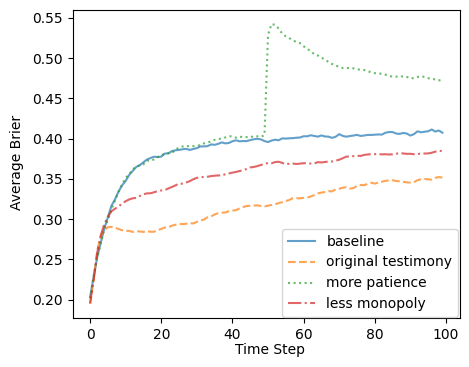

In [25]:
compare_avg(ALL, ALL_labels, 'BrierT', legend_pos=(0.91, 0.35))
# plt.savefig('graphs/Brier_all.png', dpi=400, bbox_inches='tight')

#### Meta-expertise

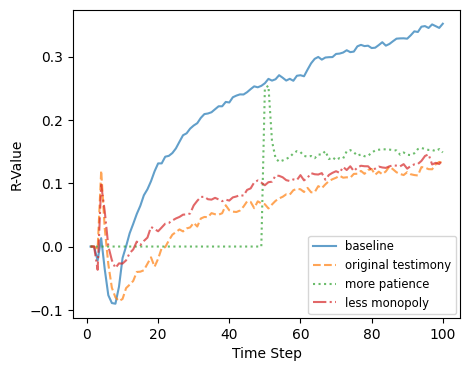

In [32]:
r1 = pickle.load(open("pickles/baseline_rval1.pickle", "rb"))
r2 = pickle.load(open("pickles/trackr_rval1.pickle", "rb"))
r3 = pickle.load(open("pickles/patient_rval1.pickle", "rb"))
r4 = pickle.load(open("pickles/om_rval1.pickle", "rb"))
rval_pickles = [r1, r2, r3, r4]

compare(rval_pickles, ALL_labels, 'authority', legend_pos=(0.903, 0.33), legend=True)

# plt.savefig('graphs/meta_all.png', dpi=400, bbox_inches='tight')